# Shapiro

Shapiro es una prueba estadistica que verifica si una muestra fue tomada de una distribución normal.

- https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
La hipotesis nula es que la muestra fue tomada de una distribución normal, para rechazar la hipotesis es necesario
obtener un valor menor al alpha deseado

- Este es el paper original: https://www.jstor.org/stable/2333709?seq=1

In [1]:
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [4]:
def gen_normal(mu=0, sigma=3, N=1000):
    s1 = np.random.normal(mu, sigma, N)
    return s1

def gen_uniform(mu=0, sigma=3, N=1000):
    s1 = np.random.uniform(mu, sigma, N)
    return s1

def gen_binomial(p=0.5, n=10, N=1000):
    s1 = np.random.binomial(n, p, N)
    return s1

def plot_shapiro_against_N(min_value=5, max_value=1000, f=gen_normal):
    results = []
    for i in range(min_value, max_value, 20):
        results.append(np.concatenate([
            [i], shapiro(f(N=i))
        ]))
    results = list(zip(*results))
    plt.plot(results[0], results[1], color="blue", label="statistic")
    plt.plot(results[0], results[2], color="green", label="p-value")

## NORMAL: Gráficar el p-value y el estadistico contra el número de muestras

Contrario a lo que pense el p-value no mejora con el número de muestras, el estadistico en cambio converge a uno. Los valores del p-value cambian mucho durante cada ejecución.

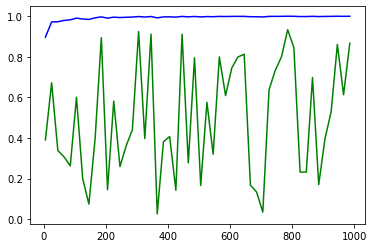

In [5]:
plot_shapiro_against_N()

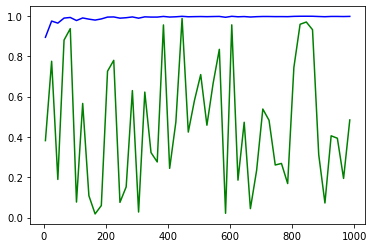

In [6]:
plot_shapiro_against_N()

## UNIFORME: Gráficar el p-value y el estadistico contra el número de muestras

Por otro lado el p-value de un distribución uniforme rapidamente converge a cero

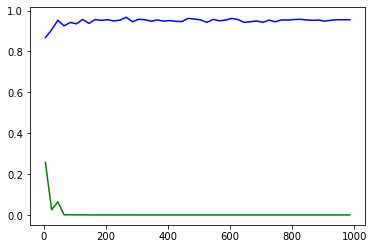

In [7]:
plot_shapiro_against_N(f=gen_uniform)

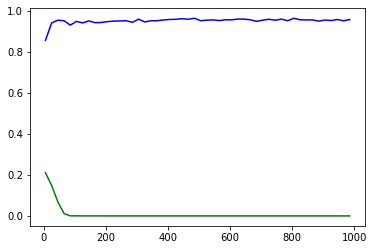

In [8]:
plot_shapiro_against_N(f=gen_uniform)

## BINOMIAL: Gráficar el p-value y el estadistico contra el número de muestras

Por otro lado el p-value de un distribución uniforme rapidamente converge a cero

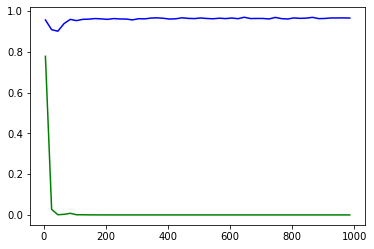

In [9]:
plot_shapiro_against_N(f=gen_binomial)

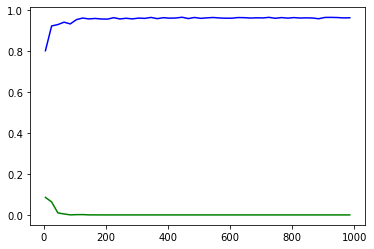

In [10]:
plot_shapiro_against_N(f=gen_binomial)

## Gráficar la distribución del p-value

In [11]:
STATISTICS = "Promedio: {}, Desviación estandar: {}"

def plot_disitributions(data, title):
    print(title + " --> " + STATISTICS.format(np.mean(data), np.std(data)))

    fig = plt.figure(figsize=(14, 4))
    fig.suptitle(title)
    ax = fig.add_subplot(1, 2, 1)
    ax.grid(color='r', linestyle='-', linewidth=0.5)
    sns.distplot(data, ax=ax, bins=100)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.grid(color='r', linestyle='-', linewidth=0.5)
    kwargs = {'cumulative': True}
    sns.distplot(data, ax=ax, hist_kws=kwargs, kde_kws=kwargs, bins=100)
    
def plot_p_value_dist(N = 1000, k = 1000, f=gen_normal, plots=True):
    a = list(map(lambda e: f(N=k), range(N)))
    b = list(map(lambda e: shapiro(e), a))
    c = list(zip(*a))
    if plots:
        plot_disitributions(c[1], "p-value distribution")
        plot_disitributions(c[0], "statistic distribution")
    return np.array(c[0])

### NORMAL: Gráficar la distribución del p-value

p-value distribution --> Promedio: 0.0307475261903977, Desviación estandar: 3.0249231557682585
statistic distribution --> Promedio: -0.010159622416557141, Desviación estandar: 3.034344593974696


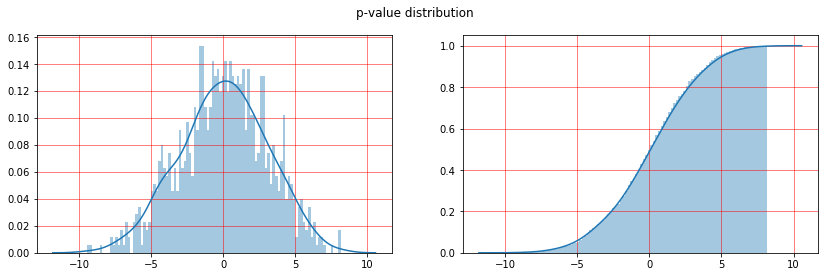

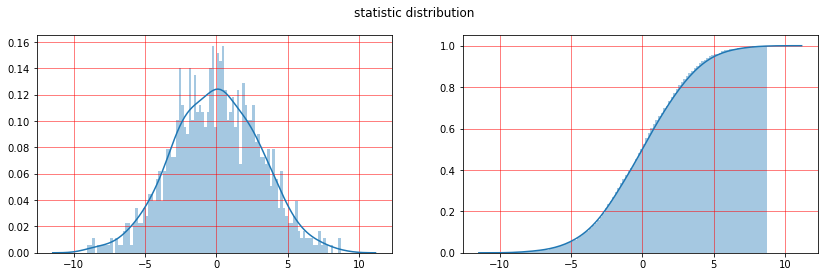

In [12]:
statistic = plot_p_value_dist()

### UNIFORME: Gráficar la distribución del p-value

p-value distribution --> Promedio: 1.5537962735709347, Desviación estandar: 0.8320560053204935
statistic distribution --> Promedio: 1.5418420331215097, Desviación estandar: 0.8600403221512658


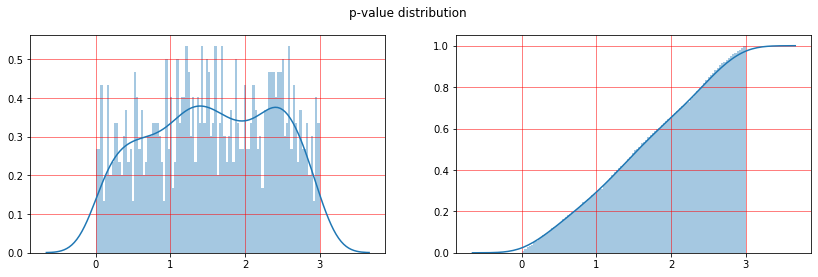

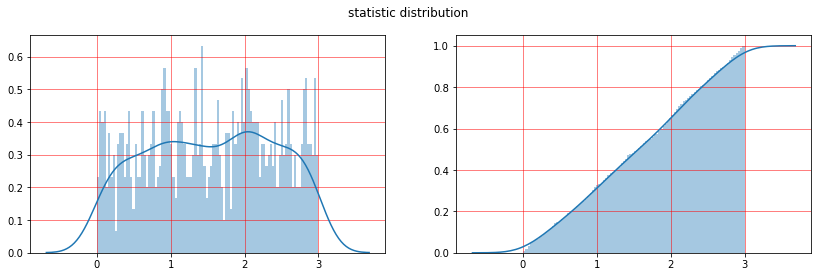

In [13]:
statistic = plot_p_value_dist(f=gen_uniform)

### BINOMIAL: Gráficar la distribución del p-value

p-value distribution --> Promedio: 5.03, Desviación estandar: 1.565598926928605
statistic distribution --> Promedio: 4.922, Desviación estandar: 1.5955926798528501


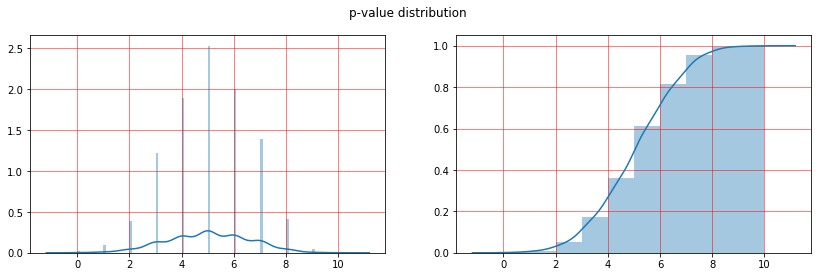

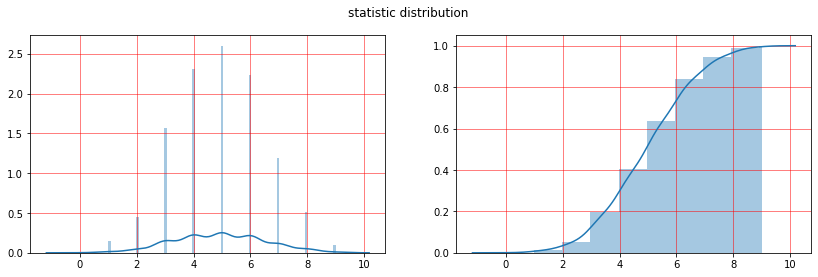

In [14]:
statistic = plot_p_value_dist(f=gen_binomial)

## Se falla en rechazar la hipotesis Nula

Para esta prueba se escoge un alfa de 0.05: Cual es la probabilidad de rechazar la hipotesis nula erroneamente?

- Usando las funciones de arriba puedo generar una muestra grande del estadistico que calcula shapiro, si el alpha habla de la probabilidad de encontrar un estadistico irregular que nos haga pensar de forma erronea que la distribución NO es es normal, la irregularidad de este estadistico debería resaltar al momento de observar el histograma de esta muestra. 

In [16]:
N = 1000
sample = gen_normal(N)
sample_shapiro = shapiro(sample)
normal_statistic = plot_p_value_dist(f=gen_uniform, plots=False, N=10000)

#bins = np.arange(min(normal_statistic), max(normal_statistic), (max(normal_statistic) - min(normal_statistic))/101)
hist, bins = np.histogram(normal_statistic)

In [17]:
## El resultado indica que la hipotesis no se puede rechazar por ende se acepta que la distribucón es normal

sample_shapiro

(0.9978270530700684, 0.21756933629512787)

### El resultado del p-value es coherente con el histograma de estadisticos

- Al igual que el p-value de shapiro la probabilidad de encontrar un estadistico al menos tan grande como el observado es mayor a 0.05

In [18]:
## Probabilidad de encontrar un evento que es mayor que el estadistico en la muestra.

x = np.where(bins[:-1] > sample_shapiro[0])
np.sum(hist[x])/np.sum(hist)

0.6059

In [19]:
## Probabilidad de encontrar un evento que es mayor que el estadistico en la muestra.

x = np.where(normal_statistic > sample_shapiro[0])
len(normal_statistic[x])/len(normal_statistic)

0.669

### Se rechaza la hipotesis nula cuando debio haberse aceptado, falso positivo

### Se falla en rechazar la hipotesis nula cuando debio haberse rechazado, positivo falso